# Text classification problem

In [110]:
import pandas as pd
import numpy as np
import statistics
import math
import re

import string
import spacy
from spacy.lang.en import English

import matplotlib.pyplot as plt
from collections import Counter

# Data Analysis and Preprocess

**Read the dataset**

In the following cell, you havt to implement a procedure to read the .txt files from the dataset provided to you and add their content to a pandas dataframe. 
Becuase our problem is text classification, please provide each text category in other cell which is the .txt files root directory's name.

Please name the text column as _text_ and category column as _category_

In [111]:
import os , glob
def parse_files(path):
  dirs = os.listdir(path)
  data = {'text': [], 'category': []}
  for dir_ in dirs:
    txts = glob.glob('{}/{}/*.txt'.format(path, dir_))
    for txt in txts:
      try:
        f = open(txt, 'r')
        lines = f.readlines()
        f.close()        
        text_content = ''.join(lines)
        data['text'].append(text_content)
        data['category'].append(dir_)
      except:
        print(dir_)
        print(txt)
  df = pd.DataFrame(data, columns=['text', 'category'])
  return df

In [112]:
# import zipfile
# with zipfile.ZipFile('/content/Text_dataset.zip', 'r') as zip_ref:
#     zip_ref.extractall('raw')
path = '/content/raw/raw'
df = parse_files(path)
df.head()

sport
/content/raw/raw/sport/199.txt


,text,category
0,Film production 'falls' 40% in UK\n\nThe numbe...,entertainment
1,Foxx and Swank take actors awards\n\nJamie Fox...,entertainment
2,Bollywood DVD fraudster is jailed\n\nA major d...,entertainment
3,Rocker Doherty in on-stage fight\n\nRock singe...,entertainment
4,Eminem secret gig venue revealed\n\nRapper Emi...,entertainment


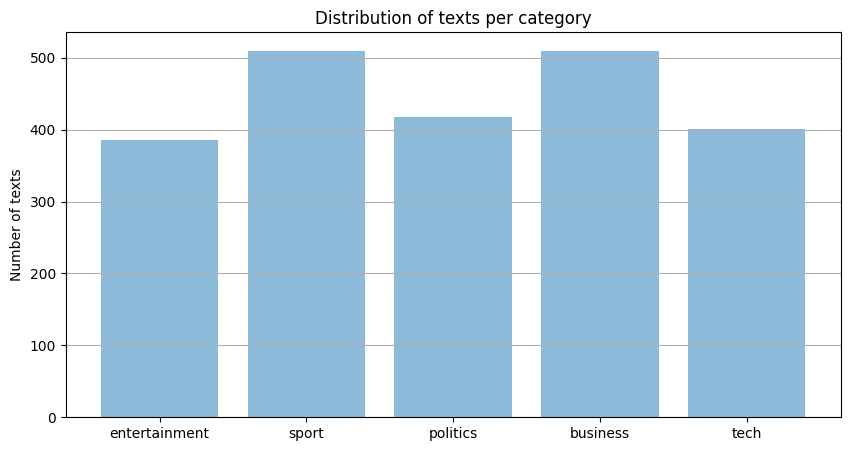

Counter({'sport': 510, 'business': 510, 'politics': 417, 'tech': 401, 'entertainment': 386})


In [113]:
'''
after preparing the dataframe, let's count the number of the text file per category
Plot them as a bar plot
'''
categories = df[['category']].values.reshape(-1)

counter_categories = Counter(categories)
category_names = counter_categories.keys()
category_values = counter_categories.values()

y_pos = np.arange(len(category_names))

plt.figure(1, figsize=(10, 5))
plt.bar(y_pos, category_values, align='center', alpha=0.5)
plt.xticks(y_pos, category_names)
plt.ylabel('Number of texts')
plt.title('Distribution of texts per category')
plt.gca().yaxis.grid(True)
plt.show()

print(counter_categories)

In order to compare the results later, we have defined a function to calculate the statistics of the dataset, and then we have called it after each preprocess step.

In [115]:
## just run the below cell

def Amar_dataset(df, split_char=' '):
    categories = df['category'].unique()
    
    all_lengths = []
    per_category = {
        'lengths': {c:[] for c in categories},
        'mean': {c:0 for c in categories},
        'stdev': {c:0 for c in categories}
    }

    for index, row in df.iterrows():
        text = row['text']
        text = re.sub(r"\s+", ' ', text) # Normalize
        text = text.split(split_char)
        l = len(text)
        
        category = row['category']
        
        all_lengths.append(l)
        per_category['lengths'][category].append(l)
    
    for c in categories:
        per_category['mean'][c] = statistics.mean(per_category['lengths'][c])
        per_category['stdev'][c] = statistics.stdev(per_category['lengths'][c])
    
    global_stats = {
        'mean': statistics.mean(all_lengths),
        'stdev': statistics.stdev(all_lengths),
        'lengths': all_lengths
    }
    
    return {
        'global': global_stats,
        'per_category': pd.DataFrame(per_category)
    }

def Hist_of_statas(df_stats, n_cols=3):
  '''
  This function is used to plot the statistics claculated in the previous function
  '''
  categories = df['category'].unique()
  n_rows = math.ceil(len(categories) / n_cols)
  
  plt.figure(figsize=(15, 8))
  plt.suptitle('Distribution of lengths')
  
  # Subplot of all lengths
  plt.subplot(n_rows, n_cols, 1)
  plt.title('All categories')
  lengths = df_stats['global']['lengths']
  plt.hist(lengths, color='r')

  # Subplot of each category
  index_subplot = 2
  for c in categories:
      plt.subplot(n_rows, n_cols, index_subplot)
      plt.title('Category: %s' % c)
      
      lengths = df_stats['per_category']['lengths'][c]
      plt.hist(lengths, color='b')

      index_subplot += 1

  plt.show()

In these histograms and stats, we can see that almost all texts contain $1000$ or less words. Also, we can see that the average length is very different depending on the category.

In [116]:
df_stats = {}

df_stats['initial'] = Amar_dataset(df)
df_stats['initial']['per_category']

,lengths,mean,stdev
entertainment,"[428, 335, 323, 359, 291, 246, 292, 201, 336, ...",331.621762,261.795254
sport,"[454, 812, 377, 150, 388, 134, 293, 233, 481, ...",330.039216,188.080132
politics,"[614, 376, 503, 463, 465, 418, 371, 512, 531, ...",454.973621,300.120275
business,"[328, 537, 411, 275, 201, 224, 174, 288, 492, ...",329.880392,135.919077
tech,"[273, 574, 812, 582, 636, 368, 692, 961, 1235,...",503.695761,239.849176


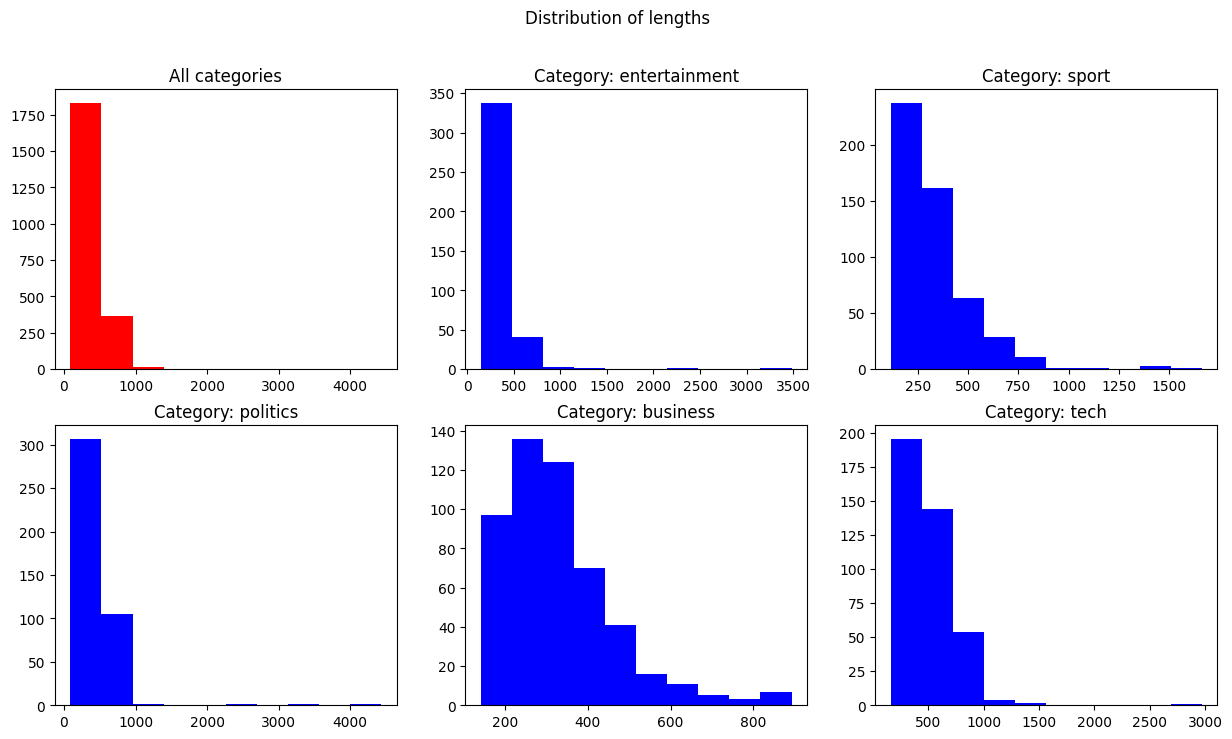

In [117]:
Hist_of_statas(df_stats['initial'])

**Preprocess: clean characters**

Before we start to apply other techniques to clean the texts, we have removed every character which cannot be used to write words in English (this set of characters is different in other languages). Using the following function, we have removed all puntuation symbols from all texts as well as we have normalized the white spaces.

In [118]:
'''
complete following function to iterate over the dataframe you provided before
and use the symbols in the "string.puntuation" to find all puntuations and then replace
them with ' ' in the text ypu're working on using the replace function.
Finally if there was whitespaces together please normalize them to just one space
Hint:
  https://docs.python.org/3/library/string.html#string.punctuation
  https://docs.python.org/3/library/re.html#re.sub
'''
def clean_puns(df):
    for index, row in df.iterrows():
        text = row['text']
        
        for symbol in list(string.punctuation) :
            text = text.replace(symbol, ' ')

        text = re.sub(r"\s+", ' ', text)
        
        row['text'] = text
    
    return df

In [119]:
df = clean_puns(df)
df.head()

,text,category
0,Film production falls 40 in UK The number of B...,entertainment
1,Foxx and Swank take actors awards Jamie Foxx a...,entertainment
2,Bollywood DVD fraudster is jailed A major dist...,entertainment
3,Rocker Doherty in on stage fight Rock singer P...,entertainment
4,Eminem secret gig venue revealed Rapper Eminem...,entertainment


In [120]:
df_stats['char_cleaner'] = Amar_dataset(df)
df_stats['char_cleaner']['per_category']

,lengths,mean,stdev
entertainment,"[437, 344, 330, 370, 296, 254, 307, 202, 340, ...",340.958549,267.569471
sport,"[475, 870, 386, 163, 411, 144, 307, 239, 506, ...",341.911765,193.955218
politics,"[622, 384, 518, 475, 472, 422, 379, 525, 556, ...",462.544365,305.206438
business,"[344, 557, 432, 282, 203, 229, 183, 294, 505, ...",339.323529,138.047525
tech,"[284, 596, 820, 593, 651, 382, 737, 996, 1251,...",514.276808,243.082642


The average length is greater now but, why? Since we have _normalized_ the characters in the texts, there are many more white spaces now, hence apparently there are more words. For example, if we had in the original text "*U2's desire*", now we have "*U2 s desire*" (i.e. one more word has appeared due to we have tokenized using the white spaces).

**Preprocess: Lematization**

In this notebook, we are going to do **lematization** over all the texts. To do so, we will use the library **Spacy** since it already has detailed dictionaries which the algorithm can look through to link the form back to its lemma.

We can illustrate the method with an example:

| Word | Lemma |
|---|---|
| studying | study |
| studies | study |

This process may look similar to *stemming* (which we are not going to use), but it leads to a different result.

In [123]:
## just run the below cell

def lemmatize_dataset(df, join_char=' '):
    nlp = spacy.load('en_core_web_sm', disable = ['parser','ner'])

    for index, row in df.iterrows():
        text = row['text']
        tokens = nlp(text)
        text = [ w.lemma_.strip().lower() if w.lemma_ != "-PRON-" else w.lower_ for w in tokens ]
        row['text'] = join_char.join(text)
    
    return df

In [125]:
df = lemmatize_dataset(df)
df.head() # Sample

,text,category
0,film production fall 40 in uk the number of br...,entertainment
1,foxx and swank take actor award jamie foxx and...,entertainment
2,bollywood dvd fraudster be jail a major distri...,entertainment
3,rocker doherty in on stage fight rock singer p...,entertainment
4,eminem secret gig venue reveal rapper eminem b...,entertainment


In [126]:
df_stats['lematization'] = Amar_dataset(df)
df_stats['lematization']['per_category']

,lengths,mean,stdev
entertainment,"[440, 343, 330, 370, 295, 253, 324, 202, 339, ...",341.769430,267.513653
sport,"[474, 888, 386, 162, 410, 143, 306, 238, 505, ...",341.968627,195.013412
politics,"[621, 384, 526, 475, 471, 422, 378, 524, 555, ...",463.067146,306.434490
business,"[345, 560, 432, 282, 202, 230, 182, 293, 505, ...",340.301961,138.194956
tech,"[284, 595, 819, 594, 650, 383, 736, 995, 1250,...",514.441397,243.494306


**Preprocess: Stop words**

Stop words are a set of commonly used words in any language. For example, in English, "the", "is" and "or", would easily qualify as stop words. These words are not semantically useful in the sentences, thus it is a good idea to remove them and focus on important words instead.

In [130]:
def clean_stops(df, join_char=' ', split_char=' '):
    stop_words = list(spacy.lang.en.stop_words.STOP_WORDS) + list(string.punctuation)
    nlp = English()

    for index, row in df.iterrows():
        tokens = row['text'].split(split_char)
        text = [w for w in tokens if w not in stop_words]
        row['text'] = join_char.join(text)

    return df

In [131]:
df = clean_stops(df)
df.head() # Sample

,text,category
0,film production fall 40 uk number british film...,entertainment
1,foxx swank actor award jamie foxx hilary swank...,entertainment
2,bollywood dvd fraudster jail major distributor...,entertainment
3,rocker doherty stage fight rock singer pete do...,entertainment
4,eminem secret gig venue reveal rapper eminem p...,entertainment


In [132]:
df_stats['stop_words'] = Amar_dataset(df)
df_stats['stop_words']['per_category']

,lengths,mean,stdev
entertainment,"[244, 189, 181, 191, 147, 123, 205, 105, 181, ...",184.562176,127.891604
sport,"[211, 520, 148, 90, 203, 87, 156, 112, 254, 11...",174.241176,101.937376
politics,"[322, 212, 301, 253, 229, 222, 208, 226, 310, ...",232.899281,138.719329
business,"[184, 294, 247, 168, 122, 130, 112, 155, 287, ...",189.201961,71.670225
tech,"[157, 280, 389, 301, 311, 208, 372, 465, 612, ...",262.296758,111.662748


Now we can see that, after we have removed the stop words, the average lengths have decreased significantly.

**Preprocess: TF-IDF**

The TF-IDF value is calculated by multiplying the term frequency by the inverse document frequency. 

In the following code, we have removed the words based on the TF-IDF value. That is, we have removed from the dataset those words whose TF-IDF value is less than a certain threshold.

In [133]:
## just run this cell


def tf_term(df, split_char=' '):
    tf = []
    for index, row in df.iterrows():
        tokens = row['text'].split(split_char)
        
        words_freqs = {}
        for w in tokens:
            words_freqs[w] = 1 if w not in words_freqs else (words_freqs[w] + 1)
        
        max_freq = max(list(words_freqs.values()))
        words_freqs = {w:(abs_freq / max_freq) for w, abs_freq in words_freqs.items()}
        
        tf.append(words_freqs)
    
    return tf


def idf_term(df, split_char=' '):
    idf = {}
    n_docs = len(df.index)
    
    count_usage = {}
    for index, row in df.iterrows():
        tokens = row['text'].split(split_char)
        
        vocabulary_in_doc = list(set(tokens))
        for w in vocabulary_in_doc:
            if w not in count_usage:
                count_usage[w] = 1
            else:
                count_usage[w] += 1
    
    for w, count in count_usage.items():            
        idf[w] = math.log(n_docs / count)
    
    return idf


def tf_idf_func(df, split_char=' '):
    tf = tf_term(df, split_char)
    idf = idf_term(df, split_char)
    
    tf_idf = []
    for index, row in df.iterrows():
        tokens = row['text'].split(split_char)
        vocabulary_in_doc = list(set(tokens))
        
        row_tf_idf = {}
        for w in vocabulary_in_doc:
            row_tf_idf[w] = tf[index][w] * idf[w]
        
        tf_idf.append(row_tf_idf)
    
    return tf_idf

def tf_idf_on_data(df, split_char=' ', join_char=' '):
    all_tf_idf = tf_idf_func(df, split_char)
    
    for doc_i, doc_tf_idf in enumerate(all_tf_idf):
        doc_tf_idf = {k: v for k, v in sorted(doc_tf_idf.items(), key=lambda item: item[1], reverse=True)}
        doc_tf_idf_values = np.array(list(doc_tf_idf.values()))

        probs = doc_tf_idf_values / sum(doc_tf_idf_values)
        
        p_value = 0
        for i, p in enumerate(probs):
            if p_value < 0.975:
                p_value += p
            else:
                break
        
        threshold = doc_tf_idf_values[i]
        
        row = df.loc[doc_i, :]
        tokens = row['text'].split(split_char)
        i = len(tokens)
        
        original_tokens = tokens.copy()
        while i >= 0:
            i -= 1
            
            w = tokens[i]
            if doc_tf_idf[w] < threshold:
                del tokens[i]
            
        
        doc_tf_idf = {k: v for k, v in sorted(doc_tf_idf.items(), key=lambda item: item[1])}        
        row['text'] = join_char.join(tokens)
    
    return df

In [134]:
df = tf_idf_on_data(df)
df.head() # Sample

,text,category
0,film production fall 40 uk number british film...,entertainment
1,foxx swank actor award jamie foxx hilary swank...,entertainment
2,bollywood dvd fraudster jail major distributor...,entertainment
3,rocker doherty stage fight rock singer pete do...,entertainment
4,eminem secret gig venue reveal rapper eminem p...,entertainment


We can use the implemented TF-IDF function provided in the scikit-learn
but in this notebook we implemented from scratch to see the details
you can compare the results with below function:

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [135]:
df_stats['tf_idf'] = Amar_dataset(df)
df_stats['tf_idf']['per_category']

,lengths,mean,stdev
entertainment,"[229, 175, 167, 177, 136, 109, 189, 99, 166, 1...",169.966321,120.278946
sport,"[193, 475, 136, 86, 186, 80, 141, 105, 232, 10...",160.835294,94.598273
politics,"[300, 196, 280, 233, 212, 207, 193, 210, 286, ...",217.167866,130.616403
business,"[163, 270, 224, 157, 115, 122, 102, 145, 265, ...",175.264706,66.353451
tech,"[149, 266, 363, 278, 292, 191, 336, 430, 566, ...",245.366584,104.893459


## Store parsed dataset

Finally, we have stored the dataset as a CSV file, so we could use it to train different models :)

In [136]:
## provide your path

path = '/content/dataset.csv'
df.to_csv(path, index_label=False)

# Training classifier

In this approach, We will train **Linear** model, which is already implemented in the library Scikit-Learn.

In [137]:
import pickle
import seaborn as sns

from sklearn import model_selection
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [138]:
def get_cats(df):
    return df['category'].unique()

In [139]:
## provide your path

path = '/content/dataset.csv'
df = pd.read_csv(path)
df.head()

,text,category
0,film production fall 40 uk number british film...,entertainment
1,foxx swank actor award jamie foxx hilary swank...,entertainment
2,bollywood dvd fraudster jail major distributor...,entertainment
3,rocker doherty stage fight rock singer pete do...,entertainment
4,eminem secret gig venue reveal rapper eminem p...,entertainment


In [140]:
X_data = df[['text']].to_numpy().reshape(-1)
Y_data = df[['category']].to_numpy().reshape(-1)

In [141]:
n_texts = len(X_data)
print('Texts in dataset: %d' % n_texts)

n_categories = len(get_cats(df))
print('Number of categories: %d' % n_categories)

print('Loading train dataset...')

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3)


print('Done!')

Texts in dataset: 2224
Number of categories: 5
Loading train dataset...
Done!


## Create model

Here we used `GridSearch` and cross-validation to find the best parameters.

In [142]:
'''
First of all define your params in a dictionary:
loss functions
penalties (l1 or l2)
alpha
Then define a pipeline which sequentially applys a list of transforms and a final estimator
for transformation, apply CountVectorizer and for estimator apply SGDClassifier (read the doc of the SGDClassifier)
for CountVectorizer please set strip_accents to None and disable the lowercase
Please do the search with 10-fold cross validation
finally fit the data
Hints:
  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
  https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
  https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
'''

model_params = {
    'svm__loss': ['hinge', 'modified_huber', 'log', 'squared_loss'],
    'svm__penalty': ['l1', 'l2'],
    'svm__alpha': [1e-3, 1e-4, 1e-5],
    'svm__tol': [1e-3, 1e-4],
    'svm__random_state': [42]
}

svm_model = Pipeline([('vect', CountVectorizer(strip_accents=None, lowercase=False)),
                      ('svm', SGDClassifier())])

# 10-fold cross validation
clf = model_selection.GridSearchCV(svm_model,
                                   model_params,
                                   cv=10,
                                   verbose=1)
clf.fit(X_train, Y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_s

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(lowercase=False)),
                                       ('svm', SGDClassifier())]),
             param_grid={'svm__alpha': [0.001, 0.0001, 1e-05],
                         'svm__loss': ['hinge', 'modified_huber', 'log',
                                       'squared_loss'],
                         'svm__penalty': ['l1', 'l2'],
                         'svm__random_state': [42],
                         'svm__tol': [0.001, 0.0001]},
             verbose=1)

In [143]:
print('Best parameters set:')
print(clf.best_params_)

Best parameters set:
{'svm__alpha': 0.0001, 'svm__loss': 'modified_huber', 'svm__penalty': 'l2', 'svm__random_state': 42, 'svm__tol': 0.001}


## Evaluation



In [144]:
## just run the cell

def confusion_matrix_ploting(X_test, Y_test, model):
    Y_pred = model.predict(X_test)

    con_mat = confusion_matrix(Y_test, Y_pred)
    con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

    label_names = list(range(len(con_mat_norm)))
    con_mat_df = pd.DataFrame(con_mat_norm,
                              index=label_names, 
                              columns=label_names)

    figure = plt.figure(figsize=(10, 10))
    sns.heatmap(con_mat_df, cmap=plt.cm.Blues, annot=True)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [145]:
Y_pred = clf.predict(X_test)

In [146]:
print('Accuracy: %.4f' % accuracy_score(Y_pred, Y_test))
print('Classification report:')
print(classification_report(Y_test, Y_pred))

Accuracy: 0.9671
Classification report:
               precision    recall  f1-score   support

     business       0.95      0.99      0.97       144
entertainment       0.98      0.95      0.96       128
     politics       0.96      0.95      0.96       124
        sport       0.99      0.98      0.98       149
         tech       0.97      0.96      0.96       123

     accuracy                           0.97       668
    macro avg       0.97      0.97      0.97       668
 weighted avg       0.97      0.97      0.97       668



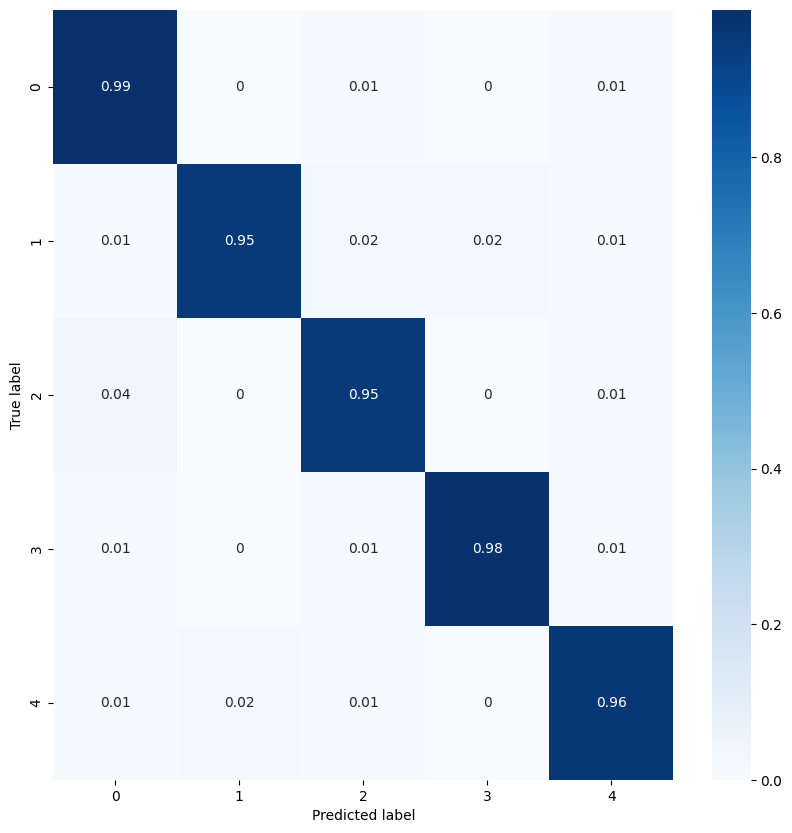

In [147]:
## run the below cell and see your model's performance

confusion_matrix_ploting(X_test, Y_test, clf)